In [3]:
pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

df = pd.read_csv("youtube_trending_videos_20.csv")
df.head()

,Video_ID,Title,Channel,Views,Likes,Comments,Publish_Date,Category
0,v1,AI Revolution in 2025,TechWorld,2542004,43236,15531,2024-11-30,Technology
1,v2,Best Coding Practices,CodeMaster,4215579,158295,10169,2023-04-02,Education
2,v3,Top 10 Gadgets of 2024,GadgetGuru,625169,111812,5466,2024-01-25,Tech Reviews
3,v4,How to Start a Startup,Startup101,2792569,127915,19985,2024-12-09,Business
4,v5,SpaceX's Latest Mars Mission,SpaceExplorer,710961,138843,14255,2024-06-16,Science


In [3]:
df.info()  # Summary of dataset
df.describe()  # Statistical overview
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video_ID      20 non-null     object
 1   Title         20 non-null     object
 2   Channel       20 non-null     object
 3   Views         20 non-null     int64 
 4   Likes         20 non-null     int64 
 5   Comments      20 non-null     int64 
 6   Publish_Date  20 non-null     object
 7   Category      20 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.4+ KB


Video_ID        0
Title           0
Channel         0
Views           0
Likes           0
Comments        0
Publish_Date    0
Category        0
dtype: int64

In [5]:
df.dropna(inplace=True)  # Drop missing values

In [7]:
df["Publish_Date"] = pd.to_datetime(df["Publish_Date"])

In [10]:
top_videos = df.sort_values(by="Views", ascending=False).head(5) # Top 5 most viewed videos
print(top_videos[["Title", "Channel", "Views"]])

                       Title       Channel    Views
5     Cryptocurrency in 2024    CryptoKing  4921510
10  How to Get Better at DSA    AlgoMaster  4759857
17          VR Gaming Trends      GameZone  4454373
18       AI-Powered Chatbots  ChatbotWorld  4359819
1      Best Coding Practices    CodeMaster  4215579


In [12]:
category_stats = df.groupby("Category")[["Likes", "Comments"]].mean() # Average likes and comments per category
print(category_stats)

                    Likes  Comments
Category                           
AI & ML          113485.0   13548.0
Automobile        18979.0    3118.0
Business         127915.0   19985.0
Cybersecurity     72487.0   23319.0
Data Science      65558.0   17014.0
Education        103686.5   15733.0
Finance          122517.0   16422.5
Gaming           104411.0    5320.0
Lifestyle         82684.0    6050.0
Productivity     163230.0   24590.0
Programming      101191.5   13351.0
Science          138843.0   14255.0
Tech Reviews     151610.5   13723.0
Technology        43236.0   15531.0
Virtual Reality  144837.0    1991.0


In [14]:
df["Year"] = df["Publish_Date"].dt.year # Trending video frequency every year
df["Year"].value_counts()

Year
2024    9
2023    9
2025    2
Name: count, dtype: int64

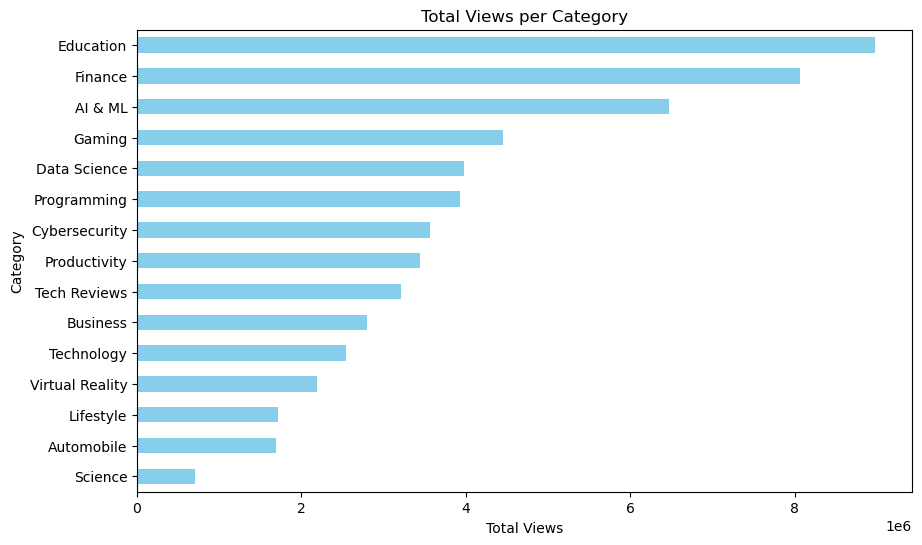

In [16]:
# BAR CHART VIEWS PER CATEGORY
import matplotlib.pyplot as plt

df.groupby("Category")["Views"].sum().sort_values().plot(kind="barh", figsize=(10,6), color='skyblue')
plt.xlabel("Total Views")
plt.ylabel("Category")
plt.title("Total Views per Category")
plt.show()


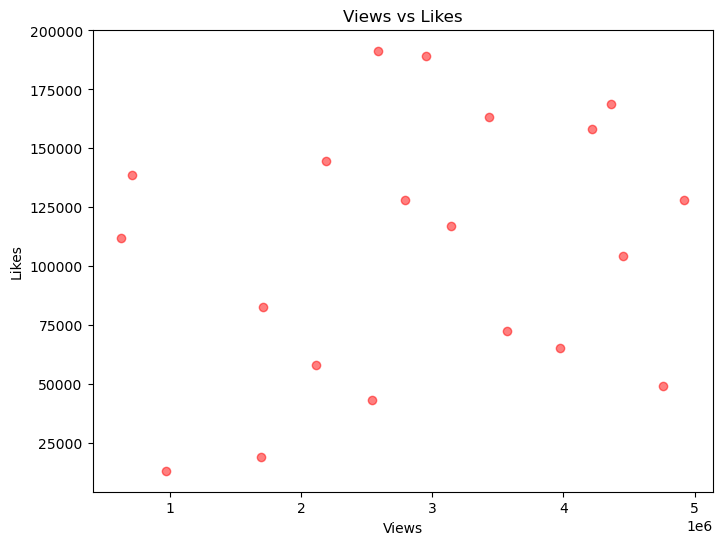

In [18]:
# SCATTER PLOT VIEWS VS LIKES
plt.figure(figsize=(8,6))
plt.scatter(df["Views"], df["Likes"], color='red', alpha=0.5)
plt.xlabel("Views")
plt.ylabel("Likes")
plt.title("Views vs Likes")
plt.show()

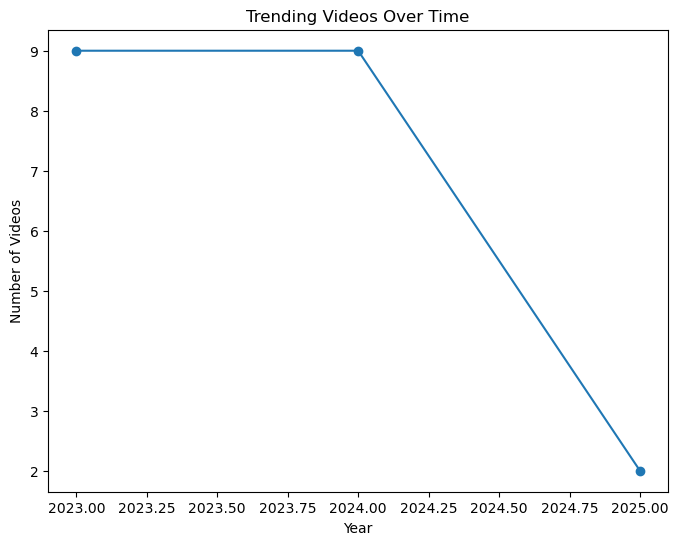

In [20]:
# LINE PLOT - VIDEOS UPLOAD TREND OVER TIME
df.groupby("Year").size().plot(kind="line", marker="o", figsize=(8,6))
plt.xlabel("Year")
plt.ylabel("Number of Videos")
plt.title("Trending Videos Over Time")
plt.show()

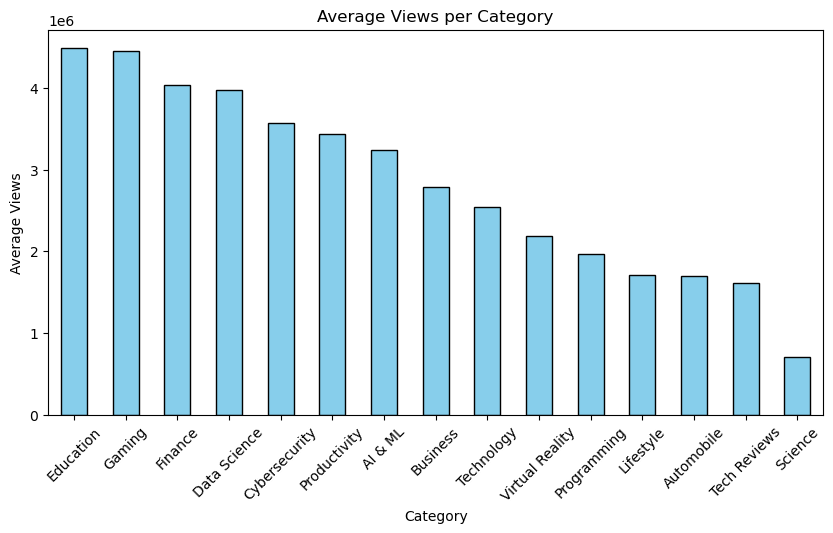

In [26]:
# Group by Category and calculate average views, likes, and comments
category_popularity = df.groupby("Category")[["Views", "Likes", "Comments"]].mean()

# Sort by average views
category_popularity = category_popularity.sort_values("Views", ascending=False)

# Plot the results
plt.figure(figsize=(10,5))
category_popularity["Views"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Views per Category")
plt.xlabel("Category")
plt.ylabel("Average Views")
plt.xticks(rotation=45)
plt.show()

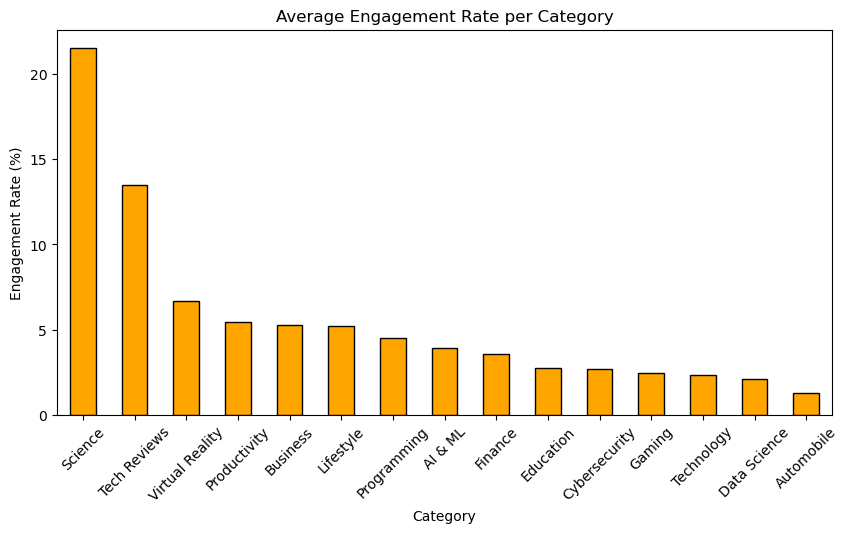

In [34]:
# Calculate engagement rate
df["engagement_rate"] = ((df["Likes"] + df["Comments"]) / df["Views"]) * 100

# Display average engagement per category
engagement_by_category = df.groupby("Category")["engagement_rate"].mean().sort_values(ascending=False)

# Plot engagement rate
plt.figure(figsize=(10,5))
engagement_by_category.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average Engagement Rate per Category")
plt.xlabel("Category")
plt.ylabel("Engagement Rate (%)")
plt.xticks(rotation=45)
plt.show()


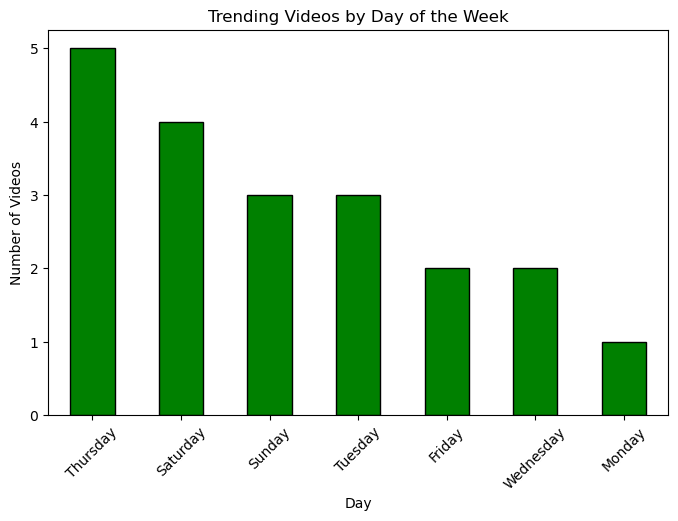

In [40]:
# Convert publish_date to datetime format (if not done already)
df["publish_date"] = pd.to_datetime(df["Publish_Date"])

# Extract the day of the week
df["publish_day"] = df["Publish_Date"].dt.day_name()

# Count the number of videos per day
publish_counts = df["publish_day"].value_counts()

# Plot
plt.figure(figsize=(8,5))
publish_counts.plot(kind="bar", color="green", edgecolor="black")
plt.title("Trending Videos by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Videos")
plt.xticks(rotation=45)
plt.show()


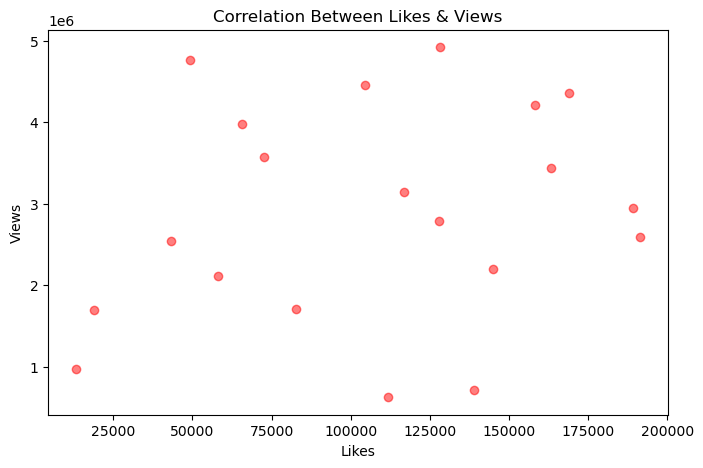

Correlation between Likes and Views: 0.22


In [51]:
# Scatter plot of likes vs views
import numpy as np  # Import numpy
plt.figure(figsize=(8,5))
plt.scatter(df["Likes"], df["Views"], color="red", alpha=0.5)
plt.title("Correlation Between Likes & Views")
plt.xlabel("Likes")
plt.ylabel("Views")
plt.show()

# Calculate correlation coefficient
correlation = np.corrcoef(df["Likes"], df["Views"])[0,1]
print(f"Correlation between Likes and Views: {correlation:.2f}")
